In [10]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist

from cobaya import load_samples
import numpy as np
%matplotlib inline 

In [12]:
boss_full = load_samples('/home/fverdian/cobaya/chains-buone/pbjboss_full/full', to_getdist=True)
boss_full.label='pbj full'
print([pn.name for pn in boss_full.paramNames.names])

boss_b1 = load_samples('/home/fverdian/cobaya/chains/testnewimpl/bossb1', to_getdist=True)
boss_b1.label='sampling lkl'

boss_planck = load_samples('/home/fverdian/cobaya/chains-ulysses/boss_planck/b+p', to_getdist=True)
boss_planck.label='Planck + BOSS'

['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'b2_ngc_z1', 'b2_sgc_z1', 'b2_ngc_z3', 'b2_sgc_z3', 'bG2_ngc_z1', 'bG2_sgc_z1', 'bG2_ngc_z3', 'bG2_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'tau_reio', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'A_planck', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native', 'chi2__pbjboss']


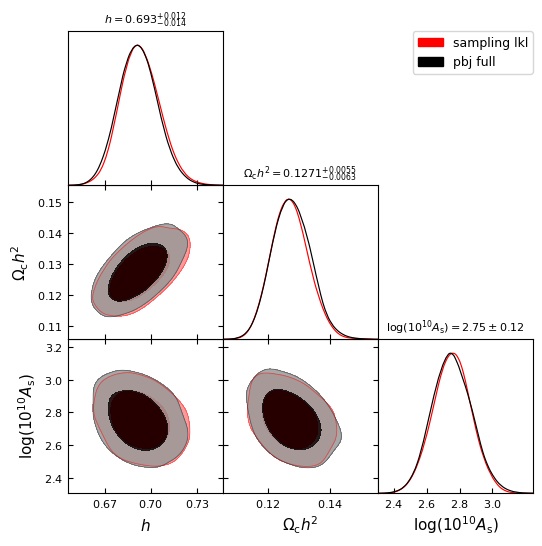

In [13]:
boss_fx = load_samples('/home/fverdian/cobaya/chains-grids/bossonlyfx/base_Mnu0p1/boss/base_Mnu0p1_boss', to_getdist=True)
boss_fx.label='kJ0p01'
p=boss_fx.getParams()
boss_fx.addDerived(p.omega_chi*93.14, name='M', label=r'Mnu', range=[0.,None])
print([pn.name for pn in boss_planck.paramNames.names])

pars_toplot =['h','omega_cdm', 'logA']
gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5

gdplot.triangle_plot([ boss_b1, boss_full],  pars_toplot, contour_colors=['r','k'], title_limit=1, filled=True)
# gdplot.finish_plot(no_tight=True)

In [15]:
# gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/contour_pbjbossfull.pdf', bbox_inches='tight')

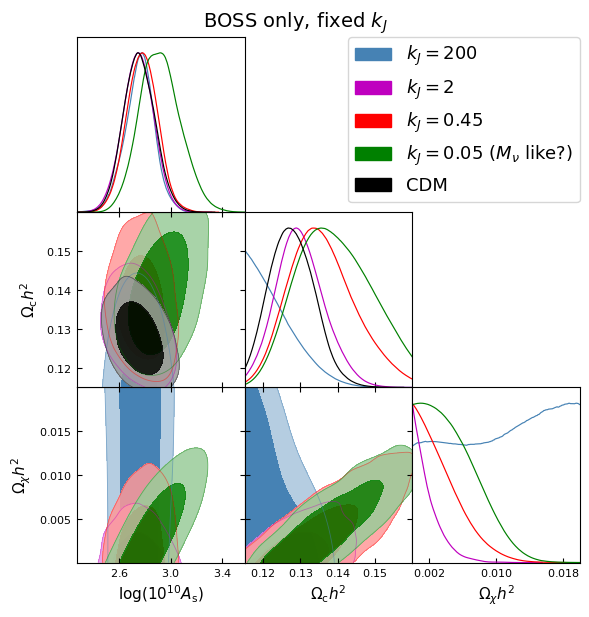

In [28]:
boss_0p05 = load_samples('/home/fverdian/cobaya/chains-grids/bossonlyfx/base_Mnu0p1/boss/base_Mnu0p1_boss', to_getdist=True)
boss_0p05.label=r'$k_J=0.05$ ($M_\nu$ like?)'

boss_0p45 = load_samples('/home/fverdian/cobaya/chains-grids/bossonlyfx/base_kJ0p45/boss/base_kJ0p45_boss', to_getdist=True)
boss_0p45.label=r'$k_J=0.45$'

boss_2p0 = load_samples('/home/fverdian/cobaya/chains-grids/bossonlyfx/base_kJ2/boss/base_kJ2_boss', to_getdist=True)
boss_2p0.label=r'$k_J=2$'

boss_200 = load_samples('/home/fverdian/cobaya/chains-grids/bossonlyfx/base_kJ200/boss/base_kJ200_boss', to_getdist=True)
boss_200.label=r'$k_J=200$'
boss_200.setRanges({'omega_chi':[0.,0.02], 'omega_cdm':[0.115,0.16]})

chains_to_plot=[boss_200, boss_2p0, boss_0p45, boss_0p05]
for ch in chains_to_plot:
    p=ch.getParams()
    # ch.addDerived(p.omega_chi*93.14, name='M', label=r'Mnu', range=[0.,None])
    # ch.addDerived(p.omega_chi/(p.omega_cdm+p.omega_b+p.omega_chi), name='fx', label=r'f_\chi', range=[0.,0.2])

pars_toplot =['logA', 'omega_cdm','omega_chi']
gdplot = gdplt.get_subplot_plotter()
boss_full.label='CDM'
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=16

gdplot.triangle_plot(chains_to_plot+[boss_full] ,  pars_toplot, title_limit=None, contour_colors=['steelblue','m', 'r','g','k'],filled=True)
gdplot.fig.text(0.5, 1.02, r'BOSS only, fixed $k_J$', ha='center', va='top', fontsize=14)
# gdplot.finish_plot(no_tight=True)
# gdplot.fig.savefig('/home/fverdian/cobaya/chains-grids/bossonlyfx/contour.pdf', bbox_inches='tight')


---
plot boss Ivanov Phylcox

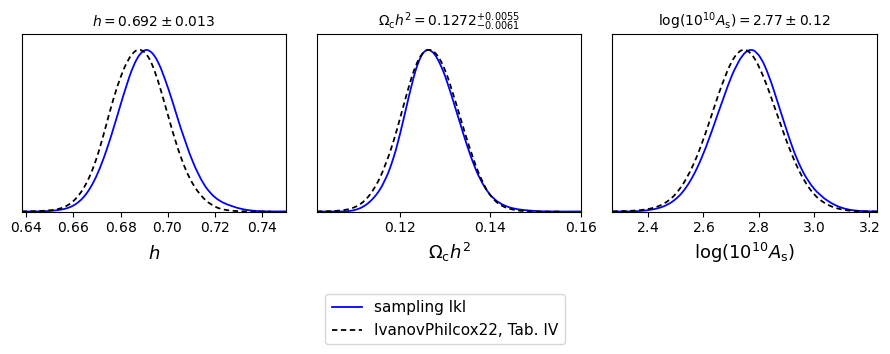

In [10]:
cosmolist=['h', 'omega_cdm', 'logA', 'n_s']
means=[0.688, 0.1268, 2.75,0.9649]
cov = np.diag(np.array([ 0.012, 0.0062, 0.12,0.0042])**2)

parlabels= ['h','\Omega_c h^2',  '\log{10^{10} A_s}', 'n_s']
ivphyl = getdist.MCSamples(samples = np.random.multivariate_normal(means, cov, 10000) ,
                        label='IvanovPhilcox22, Tab. IV',
                        names = cosmolist,
                        labels=parlabels,
                        ranges={'Mnu':[0.001,0.2],'Ombh2':[0.0216,None]})

gdplot = gdplt.get_subplot_plotter(subplot_size=3)
gdplot.settings.linewidth=1.5
gdplot.settings.subplot_size_ratio=0.95
gdplot.settings.figure_legend_loc='lower center'

gdplot.plots_1d([boss_b1, ivphyl],  pars_toplot, colors=['b','k'], nx=3,  title_limit=1, legend_ncol=1 ,ls=['-','--'])
gdplot.finish_plot()
# gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/pbjboss_ivphyl.pdf')


---
CMB

In [7]:

cmb1 = load_samples('/home/fverdian/cobaya/chains/planck_cosmopower/planck', to_getdist=True)
cmb1.label='cosmopower'
cmb_camb = load_samples('/home/fverdian/cobaya/chains-buone/planck_camb/planck', to_getdist=True)
cmb_camb.label='camb'
cmb_class = load_samples('/home/fverdian/cobaya/chains-buone/planck_class/planck', to_getdist=True)
cmb_class.label='Planck (CLASS)'
print([pn.name for pn in cmb_class.paramNames.names])


['logA', 'n_s', 'h', 'omega_b', 'omega_cdm', 'tau_reio', 'A_planck', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native']


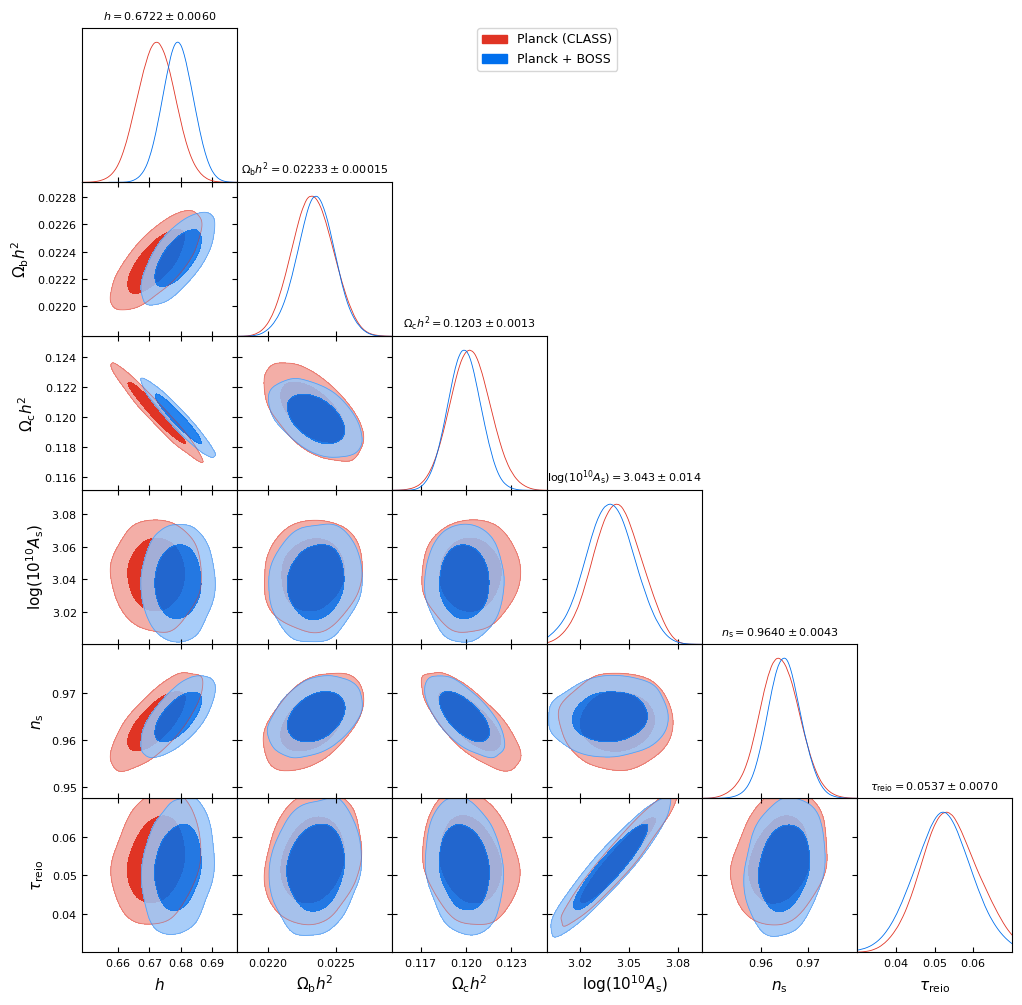

In [9]:
%matplotlib inline 
pars_toplot = ['h','omega_b','omega_cdm','logA', 'n_s', 'tau_reio']
gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot([cmb_class, boss_planck], pars_toplot, filled=True, title_limit=1)
